In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2024-03-02 13:13:13--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt.1’

names.txt.1         100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2024-03-02 13:13:13 (8.33 MB/s) - ‘names.txt.1’ saved [228145/228145]



In [ ]:
names = open("names.txt","r").read().splitlines()
len(names)

32033

In [ ]:
bigram_dict = {}
for x in names:
  chars  = ["<S>", *list(x) , "<E>"]
  for ch1, ch2 in zip(chars,chars[1:]):
    key = (ch1,ch2)
    bigram_dict[key] = bigram_dict.get(key,0)+1

In [ ]:
import torch

In [ ]:
vector = torch.ones((27,27), dtype = torch.int32)

In [ ]:
vector.size()

torch.Size([27, 27])

In [ ]:
setofChars = sorted(list(set(['.',*''.join(names)])))
stoi = {ch:i for i,ch in enumerate(setofChars)}
itos = {i:ch for i,ch in enumerate(setofChars)}

In [ ]:
for x in names:
  chars  = [".", *list(x) , "."]
  for ch1, ch2 in zip(chars,chars[1:]):
    vector[stoi[ch1],stoi[ch2]] +=1

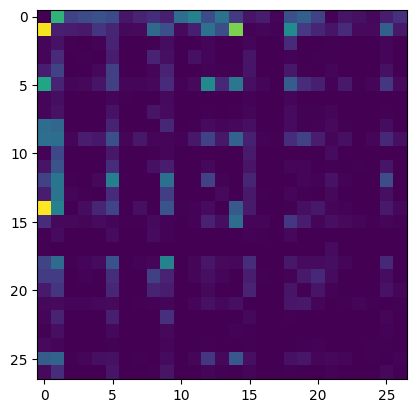

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(vector)

(-0.5, 26.5, 26.5, -0.5)

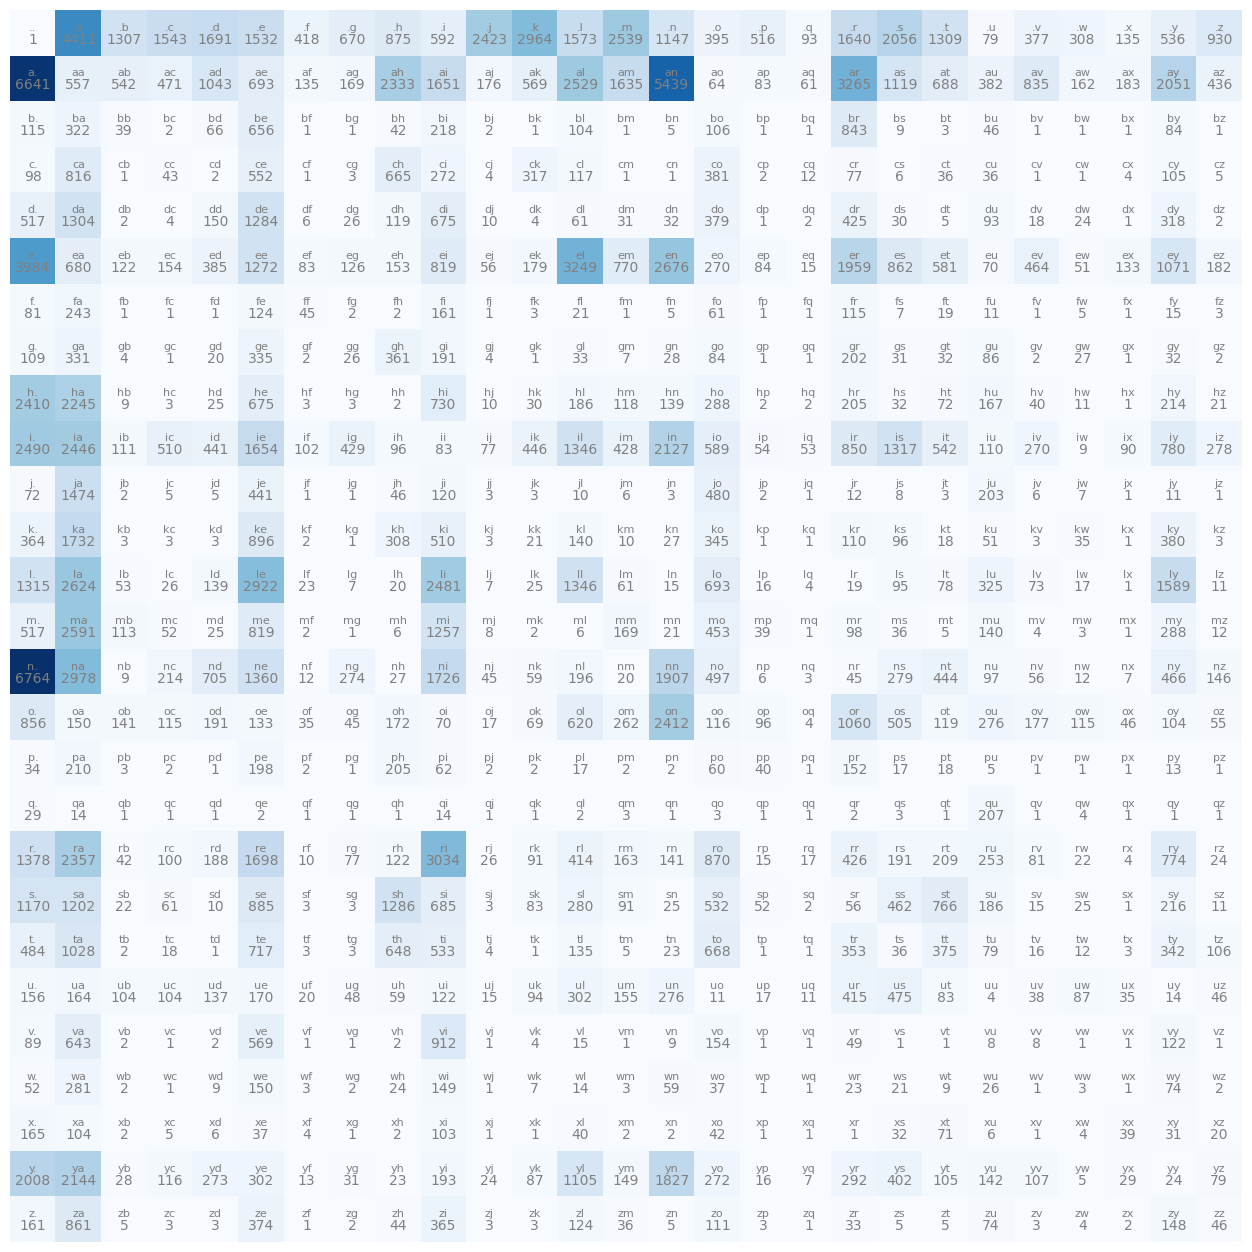

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(vector,cmap="Blues")
for i in range(27):
  for j in range(27):
    bi_set = itos[i]+itos[j]
    plt.text(j,i,bi_set,ha='center',va='bottom',color='gray',fontsize=8)
    plt.text(j,i,vector[i,j].item(),ha='center',va='top',color='gray')
plt.axis("off")

In [ ]:
probabilties = vector.float()
probabilties = probabilties / torch.reshape(probabilties.sum(0,keepdim=True),(27,1))
probabilties[0].sum()

tensor(1.)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
for _ in range(3):
  index = 0
  predictions = []
  while True:
    index = torch.multinomial(probabilties[index], num_samples=1, replacement=True, generator=g).item()
    predictions.append(itos[index])
    if index==0:
      break
  print(''.join(predictions))

junide.
janasah.
p.
